In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Import Dataset
df = pd.read_csv('https://raw.githubusercontent.com/siiddd/SignalStrengthUsingANN/main/signal.csv')

In [ ]:
# Check for Missing Values
df.isna().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [ ]:
# Statistical Analysis
df_stat = df.describe()
df_stat

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
#Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

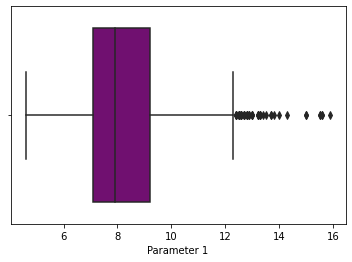

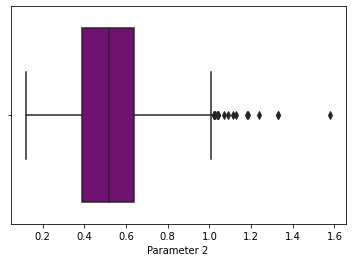

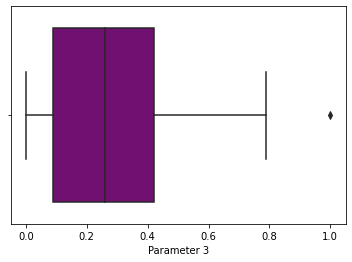

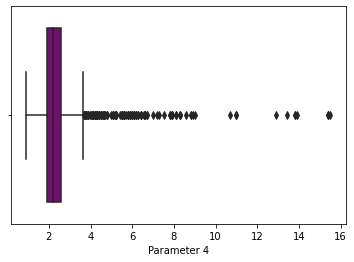

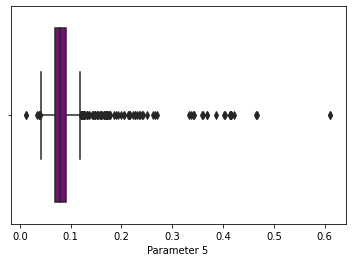

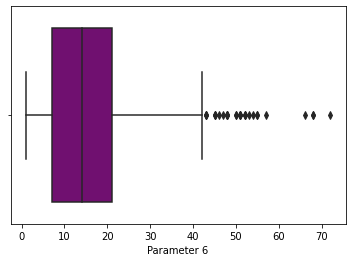

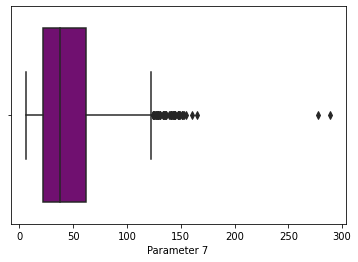

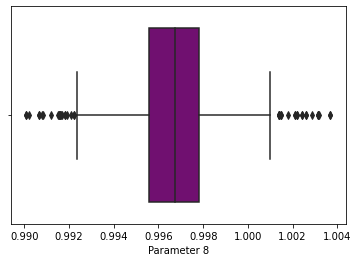

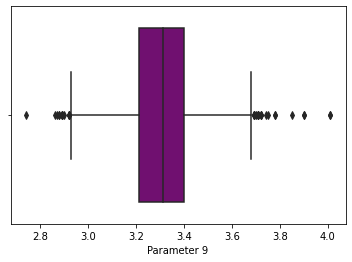

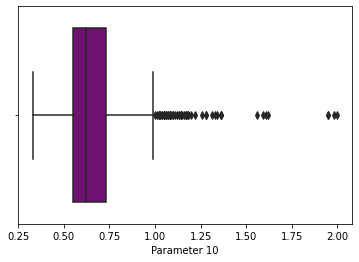

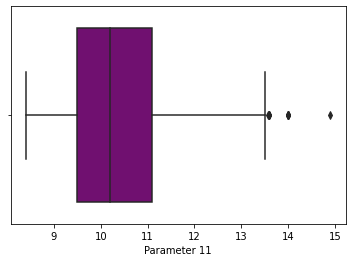

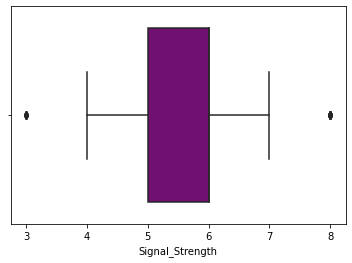

In [ ]:
%matplotlib inline

# Outlier Detection
for i in range(0, df.shape[1]):
    sns.boxplot(df.iloc[:, i], color = 'purple')
    plt.show()

In [ ]:
# Outlier Treatment
from scipy.stats import iqr as iqr

for i in range (0, df.shape[1]): #Cols
    for j in range (0, df.shape[0]): #Rows
        if(df.iloc[j,i] > (np.percentile(df.iloc[:, i], 75) + (1.5*(iqr(df.iloc[:, i]))))):
            df.iloc[j,i] = np.percentile(df.iloc[:, i], 90)

for i in range (0, df.shape[1]): #Cols
    for j in range (0, df.shape[0]): #Rows
        if(df.iloc[j,i] < (np.percentile(df.iloc[:, i], 25) - (1.5*(iqr(df.iloc[:, i]))))):
            df.iloc[j,i] = np.percentile(df.iloc[:, i], 5)

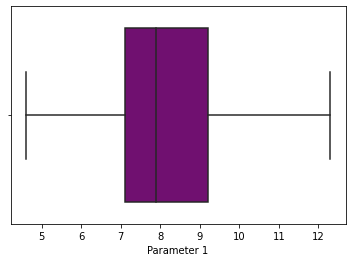

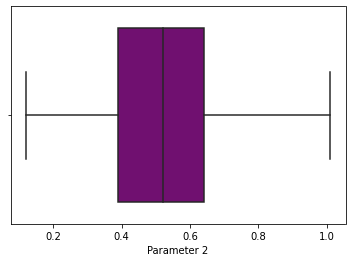

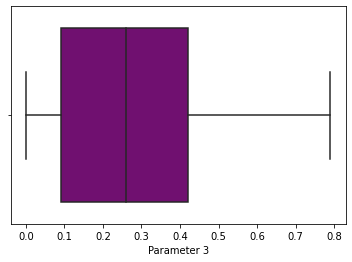

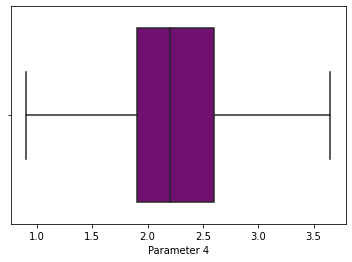

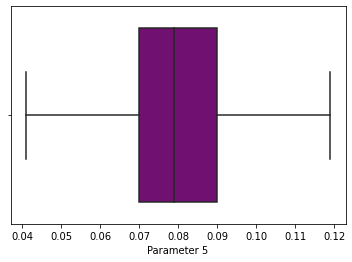

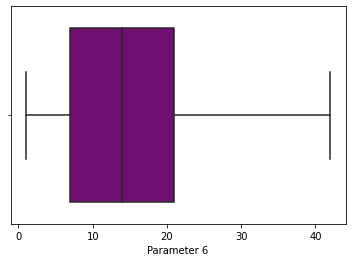

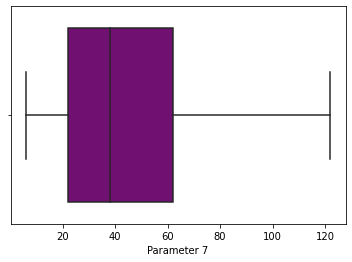

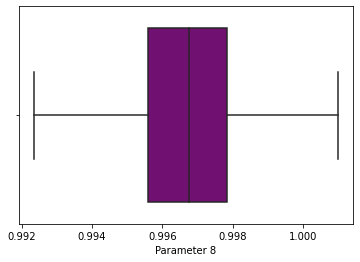

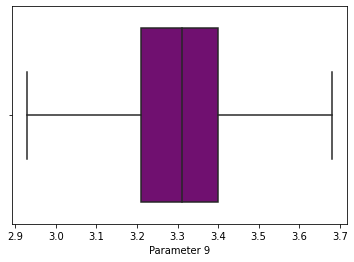

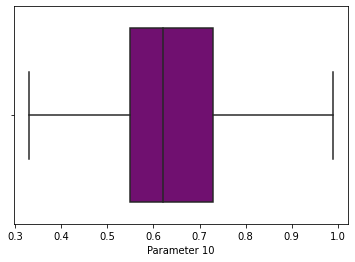

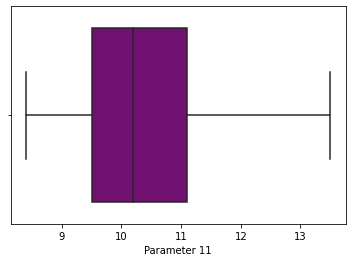

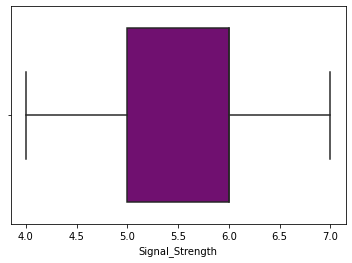

In [ ]:
# Outlier Detection
for i in range(0, df.shape[1]):
    sns.boxplot(df.iloc[:, i], color = 'purple')
    plt.show()

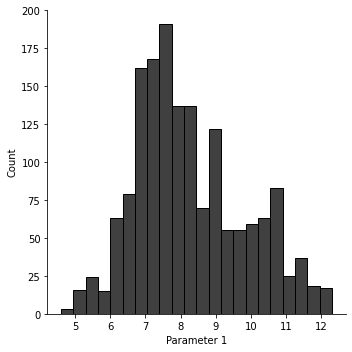

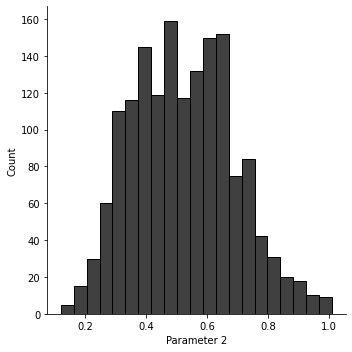

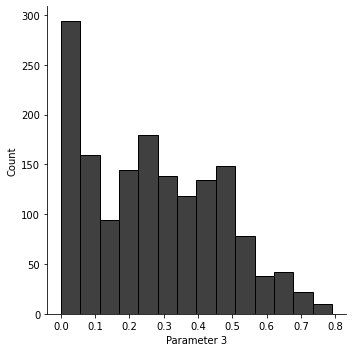

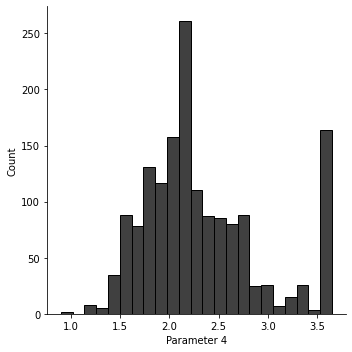

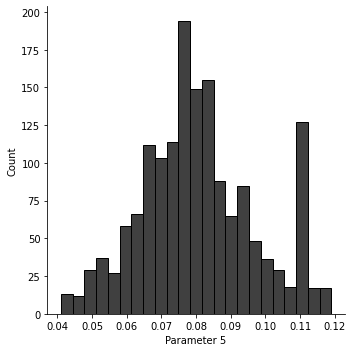

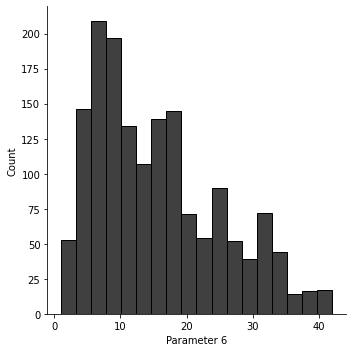

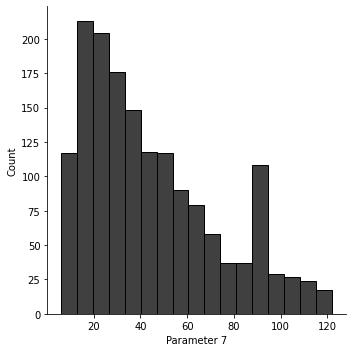

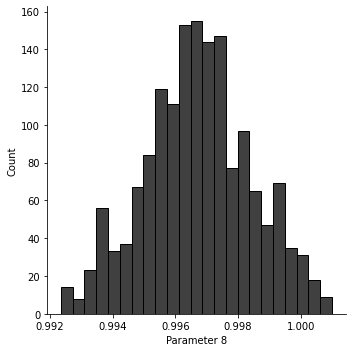

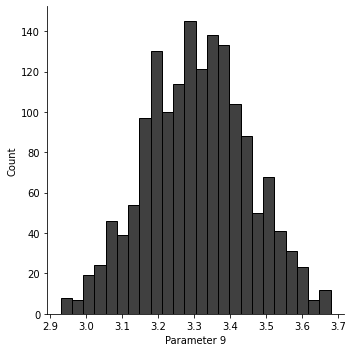

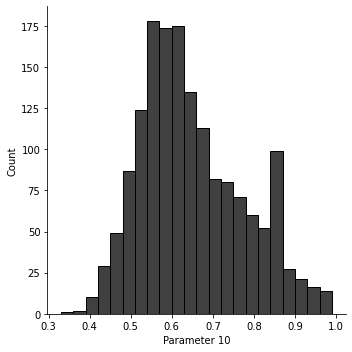

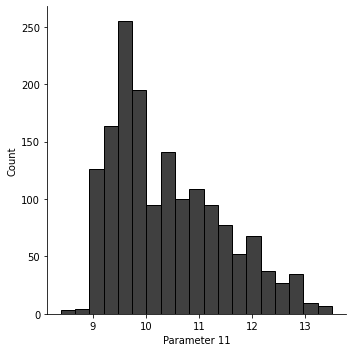

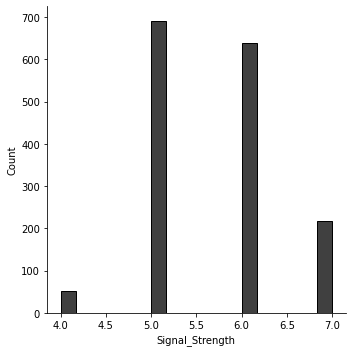

In [ ]:
# Univariate Analysis
for i in range(0, df.shape[1]):
    sns.displot(df.iloc[:, i], color = 'black')
    plt.show()

In [ ]:
# Multivariate analysis
sns.pairplot(df)

In [ ]:
# Correlation Matrix
df_corr = df.corr()
df_corr

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
Parameter 1,1.000000,-0.275030,0.672924,0.203110,0.246456,-0.159642,-0.122742,0.648562,-0.681188,0.216167,-0.063315,0.131002
Parameter 2,-0.275030,1.000000,-0.570169,0.041231,0.140994,-0.000826,0.095999,0.015954,0.234440,-0.328181,-0.217503,-0.372540
Parameter 3,0.672924,-0.570169,1.000000,0.182555,0.138565,-0.062304,0.009600,0.364101,-0.546772,0.323026,0.121288,0.228802
Parameter 4,0.203110,0.041231,0.182555,1.000000,0.221057,0.066786,0.155091,0.405796,-0.090519,0.048491,0.111660,0.026733
Parameter 5,0.246456,0.140994,0.138565,0.221057,1.000000,-0.022768,0.101824,0.415354,-0.248722,0.045084,-0.294799,-0.175168
Parameter 6,-0.159642,-0.000826,-0.062304,0.066786,-0.022768,1.000000,0.685410,-0.037145,0.083142,0.044713,-0.073079,-0.058219
Parameter 7,-0.122742,0.095999,0.009600,0.155091,0.101824,0.685410,1.000000,0.105062,-0.037564,-0.023529,-0.242659,-0.216333
Parameter 8,0.648562,0.015954,0.364101,0.405796,0.415354,-0.037145,0.105062,1.000000,-0.315678,0.153627,-0.496937,-0.173641
Parameter 9,-0.681188,0.234440,-0.546772,-0.090519,-0.248722,0.083142,-0.037564,-0.315678,1.000000,-0.098068,0.170720,-0.058868
Parameter 10,0.216167,-0.328181,0.323026,0.048491,0.045084,0.044713,-0.023529,0.153627,-0.098068,1.000000,0.182837,0.364392


In [ ]:
# Variable Inflation Factor to Eliminate Muliticollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.tools.tools import add_constant

df_constant = add_constant(df)
df_VIF = pd.DataFrame()
df_VIF['Column'] = df_constant.columns
df_VIF['VIF Values'] = [VIF(df_constant.values,i) for i in range(df_constant.shape[1])]
df_VIF

,Column,VIF Values
0,const,1.892007e+06
1,Parameter 1,5.799490e+00
2,Parameter 2,1.862081e+00
3,Parameter 3,2.978097e+00
4,Parameter 4,1.755276e+00
5,Parameter 5,1.318463e+00
6,Parameter 6,2.040939e+00
7,Parameter 7,2.340995e+00
8,Parameter 8,5.716133e+00
9,Parameter 9,2.784343e+00


In [ ]:
# Dropping Features with High VIF
df = df.drop(columns = 'Parameter 1', axis = 1)

df_constant = add_constant(df)
df_VIF = pd.DataFrame()
df_VIF['Column'] = df_constant.columns
df_VIF['VIF Values'] = [VIF(df_constant.values,i) for i in range(df_constant.shape[1])]
df_VIF


,Column,VIF Values
0,const,954879.204287
1,Parameter 2,1.861091
2,Parameter 3,2.768624
3,Parameter 4,1.588346
4,Parameter 5,1.312094
5,Parameter 6,2.026875
6,Parameter 7,2.229631
7,Parameter 8,2.784347
8,Parameter 9,1.619443
9,Parameter 10,1.351393


In [ ]:
# Encoding Signal Strength
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 

df['Signal_Strength'] = le.fit_transform(df['Signal_Strength'])
df['Signal_Strength']

0       1
1       1
2       1
3       2
4       1
       ..
1594    1
1595    2
1596    2
1597    1
1598    2
Name: Signal_Strength, Length: 1599, dtype: int64

In [ ]:
# Test Train Split
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(df.iloc[:, :-1], pd.DataFrame(df.iloc[:, -1]), train_size = 0.85)
print(x_train, y_train)

      Parameter 2  Parameter 3  ...  Parameter 10  Parameter 11
990         0.390         0.12  ...          0.49           9.4
1124        0.580         0.00  ...          0.62          11.5
1274        0.580         0.13  ...          0.53          11.2
1208        0.360         0.46  ...          0.85          11.0
1157        0.510         0.18  ...          0.87          12.9
...           ...          ...  ...           ...           ...
976         0.410         0.30  ...          0.52           9.4
1383        0.600         0.22  ...          0.49           9.9
269         0.180         0.51  ...          0.97          10.1
364         0.615         0.66  ...          0.73          10.0
1023        0.320         0.42  ...          0.55          12.3

[1359 rows x 10 columns]       Signal_Strength
990                 1
1124                0
1274                2
1208                3
1157                3
...               ...
976                 1
1383                1
269     

In [ ]:
# Feature scaling all the Features
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
x_train = normalizer.fit_transform(x_train)
x_test = normalizer.transform(x_test) 
x_train

array([[0.011293  , 0.00347477, 0.04922589, ..., 0.09150225, 0.01418864,
        0.27219022],
       [0.03193203, 0.        , 0.12112151, ..., 0.19929994, 0.03413424,
        0.63313516],
       [0.01395675, 0.00312824, 0.05053305, ..., 0.07796528, 0.01275358,
        0.2695096 ],
       ...,
       [0.00693864, 0.01965947, 0.13877271, ..., 0.12643736, 0.03739154,
        0.38933454],
       [0.01397101, 0.01499328, 0.08178151, ..., 0.06974145, 0.01658347,
        0.22717085],
       [0.01988944, 0.02610489, 0.14295536, ..., 0.20324523, 0.03418498,
        0.7645004 ]])

**We will build a Neural Network Model first without Feature Scaling and then with Feature Scaling to see the difference**

In [ ]:
# Import Neural Network Libraries
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LeakyReLU, PReLU, ELU
from keras.activations import relu, softmax, sigmoid

In [ ]:
# Add Neurons and Hidden Layers
classifier = Sequential()

classifier.add(Dense(input_dim = 10, kernel_initializer  = 'he_uniform', activation  = 'LeakyReLU', units = 100)) #Input Layer / First Hidden Layer

classifier.add(Dense(kernel_initializer  = 'he_uniform', activation  = 'LeakyReLU', units = 100)) #Second Hidden Layer

classifier.add(Dense(kernel_initializer  = 'glorot_uniform', activation = 'softmax', units = 4)) #Output Layer

In [ ]:
#Declare the Optimizer and Loss

classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1100      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 404       
Total params: 11,604
Trainable params: 11,604
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Run the ANN
ann = classifier.fit(x_train, y_train, epochs = 1000)

Epoch 1/1000
43/43 [==============================] - 3s 3ms/step - loss: 1.1596 - accuracy: 0.4209
Epoch 2/1000
43/43 [==============================] - 0s 3ms/step - loss: 1.0739 - accuracy: 0.4849
Epoch 3/1000
43/43 [==============================] - 0s 3ms/step - loss: 1.0623 - accuracy: 0.4901
Epoch 4/1000
43/43 [==============================] - 0s 3ms/step - loss: 1.0651 - accuracy: 0.4915
Epoch 5/1000
43/43 [==============================] - 0s 3ms/step - loss: 1.0590 - accuracy: 0.5018
Epoch 6/1000
43/43 [==============================] - 0s 3ms/step - loss: 1.0578 - accuracy: 0.5070
Epoch 7/1000
43/43 [==============================] - 0s 3ms/step - loss: 1.0556 - accuracy: 0.4937
Epoch 8/1000
43/43 [==============================] - 0s 3ms/step - loss: 1.0510 - accuracy: 0.4967
Epoch 9/1000
43/43 [==============================] - 0s 4ms/step - loss: 1.0552 - accuracy: 0.4901
Epoch 10/1000
43/43 [==============================] - 0s 3ms/step - loss: 1.0522 - accuracy: 0.5048